## Various Clustering Algorithms
### Priya Bannur | PA33 | 1032170692

##### Performed KMeans, Agglomerative and DBSCAN clustering
Dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/download

##### Data Preprocessing

Importing Essential Libraries

In [1]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#data manipulation
import numpy as np 
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN 

#system
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset
df = pd.read_csv('CustomerData.csv')
print(df.head())
df=df.drop('CustomerID', axis=1)
print(df.info())

   CustomerID  Gender  Age  Income  Score
0           1    Male   19      15     39
1           2    Male   21      15     81
2           3  Female   20      16      6
3           4  Female   23      16     77
4           5  Female   31      17     40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


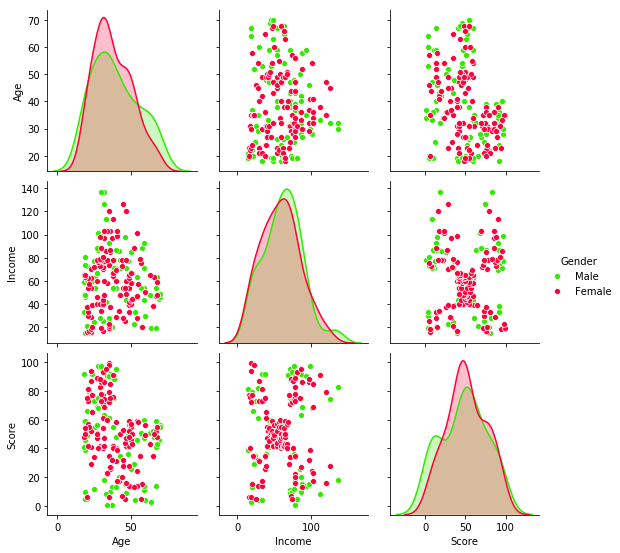

In [3]:
#visualizing data distribution using a pairplot
sns.pairplot(df, hue='Gender', aspect=1, palette='prism')
plt.show()

Binary Label Encoding for Gender

In [4]:
lb = preprocessing.LabelBinarizer()
df['Gender']=lb.fit_transform(df['Gender'])
df.head()
# Male=1, Female=0

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Check null values

In [5]:
df.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

##### K Means Clustering

To get the optimal number of clusters

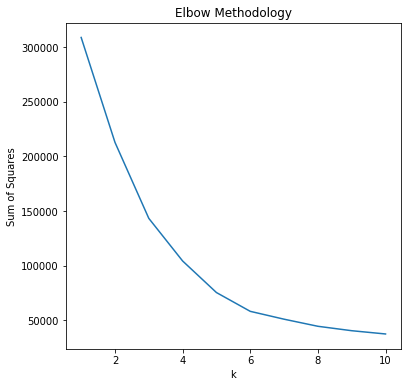

In [6]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Methodology')
ax.set_xlabel('k')
ax.set_ylabel('Sum of Squares')
plt.show()

Visualize Clusters

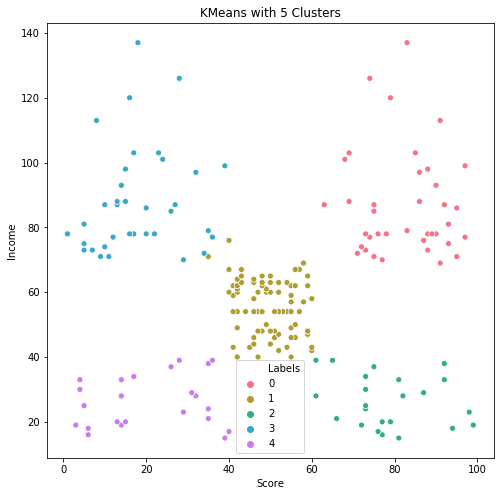

In [7]:
km3 = KMeans(n_clusters=5).fit(df)

df['Labels'] = km3.labels_
plt.figure(figsize=(8, 8))
sns.scatterplot(df['Score'], df['Income'], hue=df['Labels'], palette=sns.color_palette('husl', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

##### Agglomerative Clustering

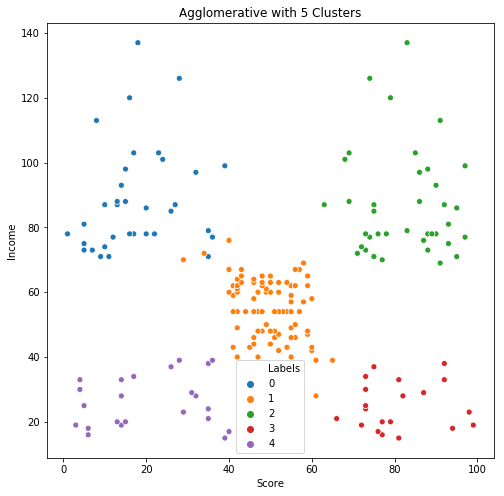

In [8]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df)

df['Labels'] = agglom.labels_
plt.figure(figsize=(8, 8))
sns.scatterplot(df['Score'], df['Income'], hue=df['Labels'], 
                palette=sns.color_palette('tab10', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

Dendogram Visualization

In [9]:
df1=df.sample(n=30)
dist = distance_matrix(df1, df1)
print(dist)

[[  0.          51.15662225  53.01886457  62.59392942  35.4541958
   47.71792116  67.78642932  52.66877633  30.31501278  27.40437921
   47.57099957  54.52522352  37.65634077  47.18050445  23.91652149
   35.38361203  42.59107888   8.24621125   8.66025404  42.14261501
   52.82045058  56.08029957  28.86173938  17.8325545   56.84188596
   19.28730152  67.49074011  47.40253158  51.76871642  29.05167809]
 [ 51.15662225   0.          28.67054237 101.27684829  44.24929378
    9.16515139 101.81355509  55.19963768  51.69139193  54.11099703
   46.26013402  30.          70.00714249  81.95730596  62.39390996
   53.63767333  44.754888    49.28488612  57.34108475  74.82646591
   94.47221814  60.7782856   54.53439282  53.8423625   84.34453154
   62.84106937  96.88137076  86.38286867  54.63515352  48.71344784]
 [ 53.01886457  28.67054237   0.         109.29318368  62.17716623
   23.10844002 109.55363983  70.33491309  58.70264049  61.72519745
   69.19537557   3.74165739  60.00833275  95.43060306  72.076

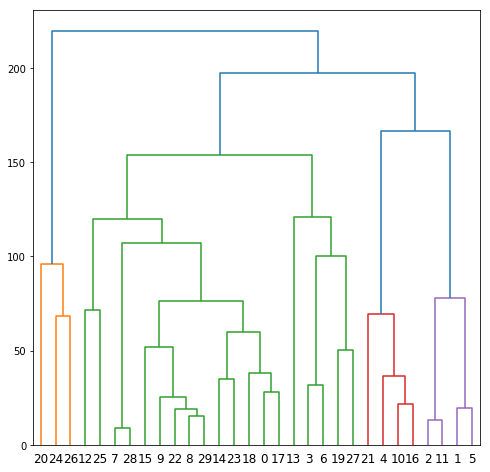

In [10]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(8,8))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12)

##### Density Based Clustering (DBSCAN)

Epsilon determine a specified radius that if includes enough number of points within, we call it dense area.

MinimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

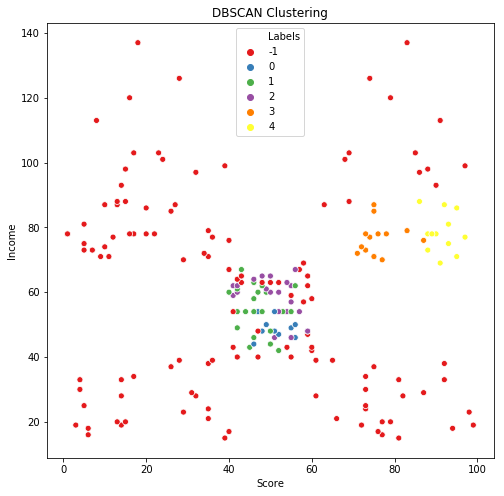

In [11]:
db = DBSCAN(eps=10, min_samples=10).fit(df)
df['Labels'] = db.labels_
plt.figure(figsize=(8, 8))
sns.scatterplot(df['Score'], df['Income'], hue=df['Labels'], 
                palette=sns.color_palette('Set1', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN Clustering')
plt.show()